<a href="https://colab.research.google.com/github/MudrikaK/Project/blob/master/Distcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Distracted Driver

In [2]:
dire = ('/content/gdrive/My Drive/Project/Data/driver_imgs_listn.csv')
print(dire)


/content/gdrive/My Drive/Project/Data/driver_imgs_listn.csv


In [3]:
import pickle
import numpy as np 
import datetime
import pandas as pd
import cv2
import os
import time
import scipy
import random
import seaborn as sns 
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import tensorflow as tf
import matplotlib.image as mpimg

from tqdm import tqdm
from sklearn.datasets import load_files       
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder

# Keras
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model



from random import shuffle 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
directory = ('/content/gdrive/My Drive/Project/Images/Train')
test_directory = ('/content/gdrive/My Drive/Project/Images/Test')
random_test = ('/content/gdrive/My Drive/Project/Images/imgs')
classes = ["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]

In [5]:
img_size1 = 240
img_size2 = 240

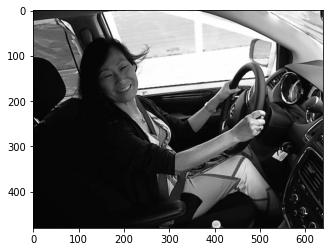

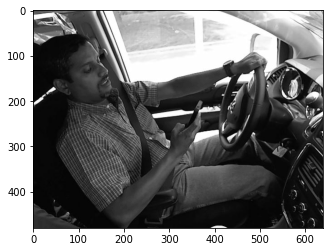

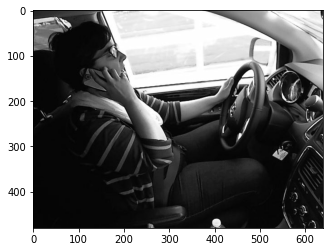

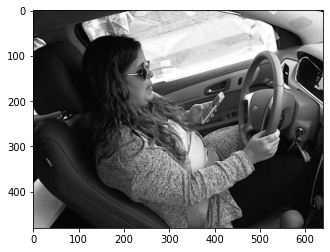

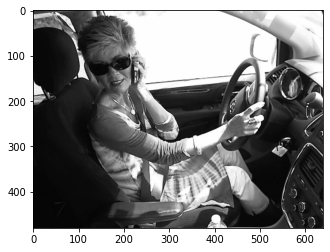

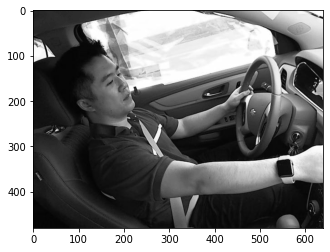

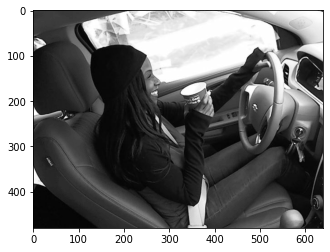

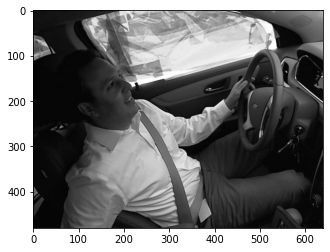

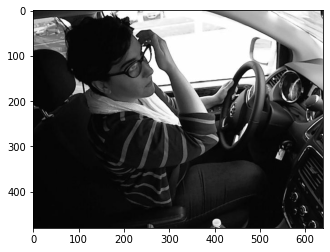

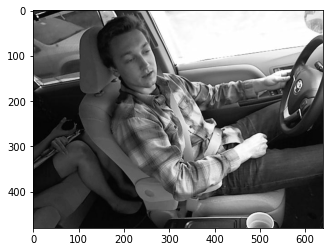

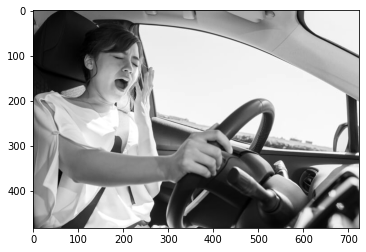

In [6]:
img_number = 100
for i in classes: 
    index = 0
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break     

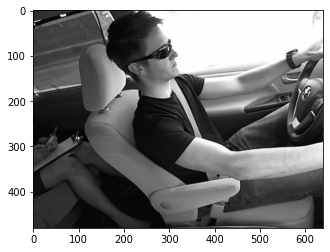

In [7]:
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [8]:
print(img_array.shape)

(480, 640)


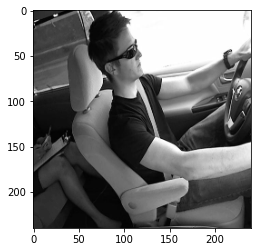

In [9]:
new_img = cv2.resize(test_array,(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [10]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])

In [12]:
testing_data = []
i = 0
print(test_directory)
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])       

/content/gdrive/My Drive/Project/Images/Test


In [13]:
create_training_data()

In [14]:
create_testing_data()

In [15]:
print(len(training_data))
print(len(testing_data))

7545
996


In [16]:
random.shuffle(training_data)

In [17]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [20]:
#X  = np.array(x[1]).reshape(-1,img_size2,img_size1,1)
#i = 1
#for i in range(len(x)):
X = np.array(x).reshape(-1,img_size2,img_size1,1)
#    X = np.append(X,Y,axis = 0)
X[0].shape
X.shape


(7545, 240, 240, 1)

In [21]:
print(X.shape)
x1=X.shape[:-1]
x1

(7545, 240, 240, 1)


(7545, 240, 240)

In [22]:
import numpy  
y1 = numpy.array(y) 
y1.shape

(7545,)

In [23]:
number_of_train = X.shape[0]

In [24]:
#new_img = X.reshape((X.shape[0]*X.shape[1]), X.shape[2])
X1 = X.reshape(number_of_train,X.shape[1]*X.shape[2])
X1.shape


(7545, 57600)

In [25]:
from pandas import DataFrame
df=DataFrame(y,columns=["class"])
print(df.shape)
x_train,x_test,y_train,y_test = train_test_split(X,df,test_size=0.3,random_state=50)


(7545, 1)


In [26]:
Y_train = np_utils.to_categorical(y_train,num_classes=11)     # these condition for cnn onlyyy
Y_test = np_utils.to_categorical(y_test,num_classes=11)

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [29]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

In [30]:
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

In [31]:
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(11,activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 32)      9

In [34]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

callbacks = [EarlyStopping(monitor='val_acc',patience=5)]


batch_size = 50
n_epochs = 10

results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test),callbacks=callbacks)


Epoch 1/10
106/106 [==============================] - 1861s 18s/step - loss: 1.8978 - acc: 0.4043 - val_loss: 0.9778 - val_acc: 0.6731
Epoch 2/10
106/106 [==============================] - 1862s 18s/step - loss: 0.7472 - acc: 0.7391 - val_loss: 0.6507 - val_acc: 0.7509
Epoch 3/10
106/106 [==============================] - 1857s 18s/step - loss: 0.3924 - acc: 0.8567 - val_loss: 0.3148 - val_acc: 0.8670
Epoch 4/10
106/106 [==============================] - 1858s 18s/step - loss: 0.2894 - acc: 0.8828 - val_loss: 0.3138 - val_acc: 0.8812
Epoch 5/10
106/106 [==============================] - 1868s 18s/step - loss: 0.2462 - acc: 0.8941 - val_loss: 0.2924 - val_acc: 0.8922
Epoch 6/10
106/106 [==============================] - 1860s 18s/step - loss: 0.2156 - acc: 0.9055 - val_loss: 0.2072 - val_acc: 0.9183
Epoch 7/10
106/106 [==============================] - 1856s 18s/step - loss: 0.1892 - acc: 0.9167 - val_loss: 0.1972 - val_acc: 0.9125
Epoch 8/10
106/106 [==============================] - 1

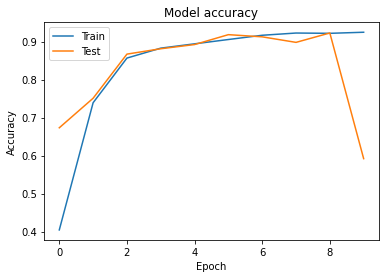

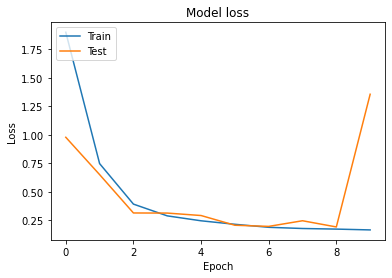

In [35]:
# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/driver.h6/assets
Predicted: 3


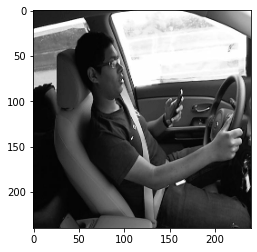

In [36]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1))
model.save_weights('/content/gdrive/My Drive/driver.h6', overwrite=True)
model.save("/content/gdrive/My Drive/driver.h6")
loaded_model = load_model('/content/gdrive/My Drive/driver.h6')
test_data = np.array(testing_data[50][1]).reshape(-1,img_size2,img_size1,1)
preds = loaded_model.predict(test_data)
print('Predicted: {}'.format(np.argmax(preds)))
new_img = cv2.resize(testing_data[50][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()


In [ ]:
# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger